# 5.관계(Relation)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import itertools

## 관계의 응용 : 관계 표현 예제

### [예제] 두 사람 간의 키 비교 관계 (비대칭, 비반사 관계)


In [ ]:
# 사람들의 키 데이터 (cm)
people = {'Yoon': 175, 'Kim': 160, 'Lee': 180, 'Park': 170}

# 사람 간의 키 비교 (누가 더 큰지 비교하는 비대칭 관계)
def compare_heights(people):
    relations = []
    for name1 in people:
        for name2 in people:
            if people[name1] > people[name2]:
                relations.append(f"{name1} is taller than {name2}")
    return relations

# 결과 출력
relations = compare_heights(people)
for relation in relations:
    print(relation)

Yoon is taller than Kim
Yoon is taller than Park
Lee is taller than Yoon
Lee is taller than Kim
Lee is taller than Park
Park is taller than Kim


### [예제] 학생과 과목 간의 등록 관계

In [ ]:

# 학생들과 수강 과목 데이터
students = {
    'Yoon': ['Math', 'Science'],
    'Kim': ['Science', 'History'],
    'Lee': ['Math'],
    'Park': ['History', 'Art']
}

# 과목별 학생 등록 관계를 출력
def print_enrollment_relations(students):
    print('# 과목별 학생 등록 관계를 출력---')
    relations = []
    for student, courses in students.items():
        for course in courses:
            relations.append(f"{student} is enrolled in {course}")
    # 과목별 학생 등록 관계출력
    for relation in relations:
        print(relation)


# 과목별 수강생 출력
def print_students_by_course(students):
    print('# 과목별 수강생 출력---')
    courses = {}
    # 학생별로 수강하는 과목을 순회
    for student, enrolled_courses in students.items():
        for course in enrolled_courses:
            if course not in courses:
                courses[course] = []         # 과목이 없으면 리스트 초기화
            courses[course].append(student)  # 해당 과목에 학생 추가

    #과목별 수강생 결과 출력
    for course, student_list in courses.items():
        print(f"Course: {course}, Students: {', '.join(student_list)}")


# 결과 출력
print_enrollment_relations(students) # 과목별 학생 등록 관계를 출력
print_students_by_course(students)   #과목별 수강생 결과 출력

# 과목별 학생 등록 관계를 출력---
Yoon is enrolled in Math
Yoon is enrolled in Science
Kim is enrolled in Science
Kim is enrolled in History
Lee is enrolled in Math
Park is enrolled in History
Park is enrolled in Art
# 과목별 수강생 출력---
Course: Math, Students: Yoon, Lee
Course: Science, Students: Yoon, Kim
Course: History, Students: Kim, Park
Course: Art, Students: Park


- 테이블 형태로 출력

In [ ]:
# 학생별  수강 과목 현황 테이블 형태로 출력

# 학생들과 수강 과목 데이터
students = {
    'Yoon': ['Math', 'Science'],
    'Kim': ['Science', 'History'],
    'Lee': ['Math'],
    'Park': ['History', 'Art']
}
# 수강 과목 추출
subjects = set(element for value_list in students.values() for element in value_list)

tables = dict()
for name in students.keys():
    items = []
    for subject in subjects:
        if subject in students[name]:
            items.append(True)
        else:
            items.append(False)
    tables[name] = items

# 학생들과 수강 과목 현황 테이블 출력
df = pd.DataFrame(tables, index=list(subjects))
df
df.T  # 행, 열 변환 (전치행렬: Transpose Matrix)

,Art,History,Science,Math
Yoon,False,False,True,True
Kim,False,True,True,False
Lee,False,False,False,True
Park,True,True,False,False


### [예제] 소셜 네트워크에서의 친구 관계(대칭적)와 팔로우 관계(비대칭적) 시각화

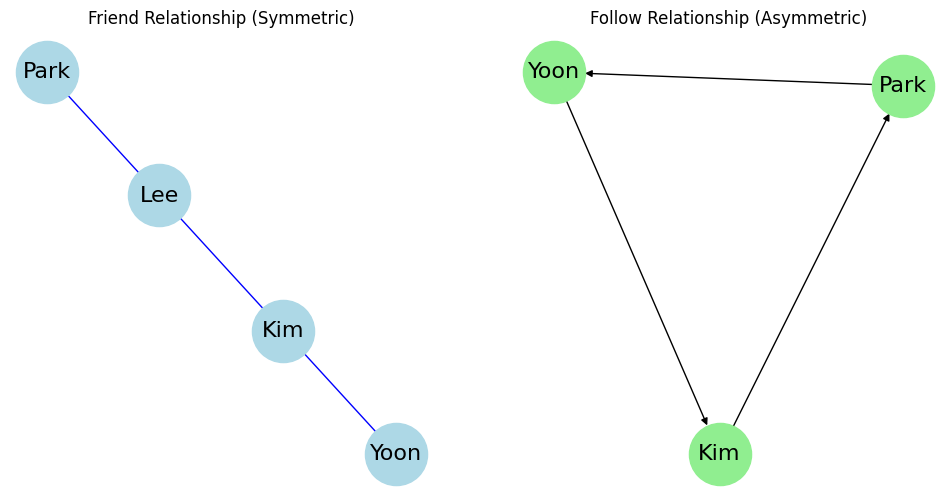

In [ ]:
# 친구 관계 (대칭적)
friend_relations = [('Yoon', 'Kim'), ('Kim', 'Lee'), ('Lee', 'Park')]

# 팔로우 관계 (비대칭적)
follow_relations = [('Yoon', 'Kim'), ('Kim', 'Park'), ('Park', 'Yoon')]

# 친구 관계 그래프 (무방향 그래프)
friend_graph = nx.Graph()
friend_graph.add_edges_from(friend_relations)

# 팔로우 관계 그래프 (방향 그래프)
follow_graph = nx.DiGraph()
follow_graph.add_edges_from(follow_relations)

# 그래프 시각화
plt.figure(figsize=(12, 6))

# 친구 관계 그래프 그리기
plt.subplot(121)
nx.draw(friend_graph, with_labels=True, node_color='lightblue', edge_color='blue', node_size=2000, font_size=16)
plt.title("Friend Relationship (Symmetric)")

# 팔로우 관계 그래프 그리기
plt.subplot(122)
nx.draw(follow_graph, with_labels=True, node_color='lightgreen', edge_color='black', node_size=2000, font_size=16, arrows=True)
plt.title("Follow Relationship (Asymmetric)")

plt.show()

- 3차원으로 시각화 표현

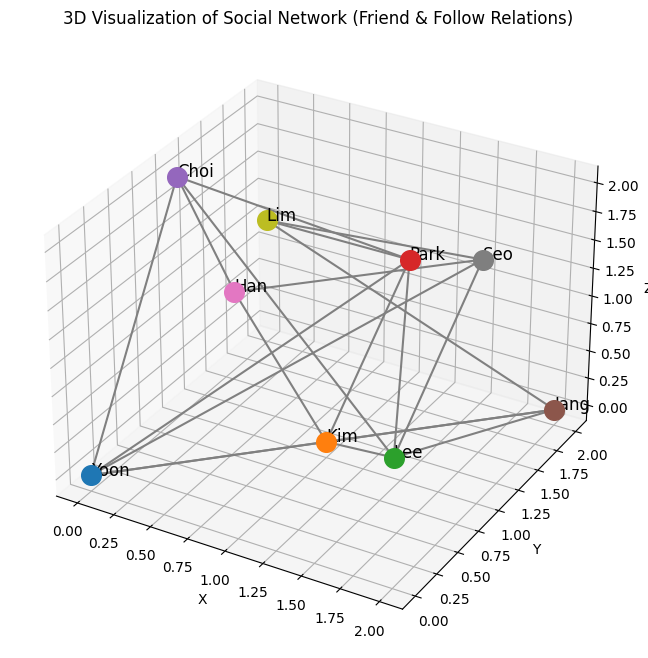

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 10명의 사용자에 대한 친구 관계 (대칭적 관계)
friend_relations = [('Yoon', 'Kim'), ('Kim', 'Lee'), ('Lee', 'Park'), ('Park', 'Choi'),
                    ('Yoon', 'Jang'), ('Kim', 'Han'), ('Lee', 'Seo'), ('Park', 'Lim'),
                    ('Choi', 'Yoon'), ('Jang', 'Lee')]

# 10명의 사용자에 대한 팔로우 관계 (비대칭적 관계)
follow_relations = [('Yoon', 'Kim'), ('Kim', 'Park'), ('Park', 'Yoon'),
                    ('Choi', 'Han'), ('Han', 'Seo'), ('Seo', 'Lim'),
                    ('Lim', 'Jang'), ('Jang', 'Kim'), ('Yoon', 'Seo'), ('Lee', 'Choi')]

# 고정된 3차원 좌표 설정
pos_3d = {
    'Yoon': (0, 0, 0),
    'Kim': (1, 1, 0),
    'Lee': (2, 0, 1),
    'Park': (1, 2, 1),
    'Choi': (0, 1, 2),
    'Jang': (2, 2, 0),
    'Han': (1, 0, 2),
    'Seo': (2, 1, 2),
    'Lim': (0, 2, 1),
    'Choi': (0, 1, 2)
}

# 3D 시각화를 위한 그래프 설정
G = nx.DiGraph()  # 방향 그래프 생성
G.add_edges_from(friend_relations)  # 친구 관계 추가
G.add_edges_from(follow_relations)  # 팔로우 관계 추가

# 그래프 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 노드 그리기
for node, (x, y, z) in pos_3d.items():
    ax.scatter(x, y, z, s=200, label=node)

# 엣지 그리기
for edge in G.edges:
    x_vals = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_vals = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_vals = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_vals, y_vals, z_vals, 'gray')

# 노드 이름 라벨링
for node, (x, y, z) in pos_3d.items():
    ax.text(x, y, z, node, fontsize=12)

# 그래프 제목 및 축 설정
ax.set_title('3D Visualization of Social Network (Friend & Follow Relations)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


### [예제] : 컴퓨터 네트워크 연결 관계

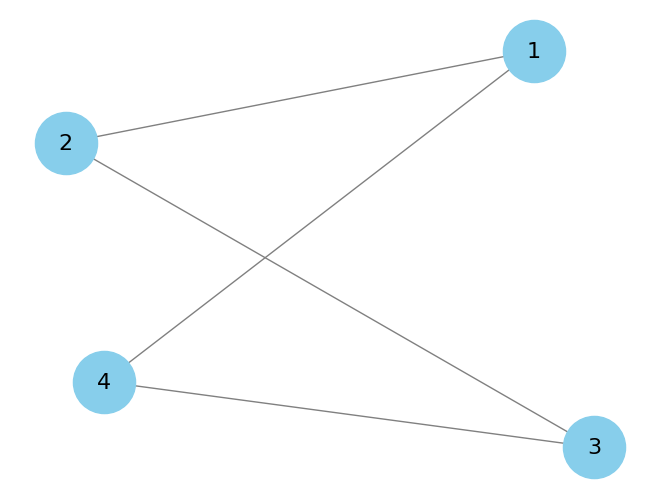

In [ ]:
# 컴퓨터 네트워크 연결 관계 (인접 행렬)
adj_matrix = [
    [0, 1, 0, 1],  # 컴퓨터 1 -> 2, 1 -> 4
    [1, 0, 1, 0],  # 컴퓨터 2 -> 1, 2 -> 3
    [0, 1, 0, 1],  # 컴퓨터 3 -> 2, 3 -> 4
    [1, 0, 1, 0]   # 컴퓨터 4 -> 1, 4 -> 3
]

# 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가
nodes = [1, 2, 3, 4]
G.add_nodes_from(nodes)

# 에지 추가 (인접 행렬을 에지로 변환)
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] == 1:
            G.add_edge(i + 1, j + 1)

# 네트워크 그래프 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=16)
plt.show()

### [예제] 관계형 데이터베이스에서 테이블 간의 관계 표현

In [ ]:
import sqlite3

# 데이터베이스 연결
conn = sqlite3.connect(':test:')
cursor = conn.cursor()

# 학생 테이블 생성 (Student)
cursor.execute('''
    CREATE TABLE Student (
        student_id INTEGER PRIMARY KEY,
        name TEXT
    )
''')

# 과목 테이블 생성 (Course), 학생과 1:N 관계
cursor.execute('''
    CREATE TABLE Course (
        course_id INTEGER PRIMARY KEY,
        course_name TEXT,
        student_id INTEGER,
        FOREIGN KEY (student_id) REFERENCES Student (student_id)
    )
''')

# 데이터 삽입
cursor.execute("INSERT INTO Student (name) VALUES ('Yoon')")
cursor.execute("INSERT INTO Student (name) VALUES ('Kim')")
cursor.execute("INSERT INTO Course (course_name, student_id) VALUES ('Math', 1)")
cursor.execute("INSERT INTO Course (course_name, student_id) VALUES ('Science', 1)")
cursor.execute("INSERT INTO Course (course_name, student_id) VALUES ('History', 2)")

# 조회: 각 학생이 수강한 과목
cursor.execute('''
    SELECT Student.name, Course.course_name
    FROM Student
    JOIN Course ON Student.student_id = Course.student_id
''')

rows = cursor.fetchall()

for row in rows:
    print(row)

# 데이터베이스 연결 종료
conn.close()

('Yoon', 'Math')
('Yoon', 'Science')
('Kim', 'History')




---





## 5-1. 곱집합
- 순서쌍들로 이루어진 집합
- 각 집합의 원소를 각 성분으로 하는 튜플들의 집합
- Product set, Produdct
- 데카르트곱(Cartesian Product)

### 순서쌍(ordered pair) 표현하기

In [ ]:
A = 'ABCD'
B = 'XY'

sets = set()
for a in A:
    for b in B:
        sets.add( (a, b) )
sets

{('A', 'X'),
 ('A', 'Y'),
 ('B', 'X'),
 ('B', 'Y'),
 ('C', 'X'),
 ('C', 'Y'),
 ('D', 'X'),
 ('D', 'Y')}

### [예제 5-3] *곱집합*
- $A$ x $B$
- $B$ x $A$

In [ ]:
A = {'A','B','C','D'}
B = {'X','Y'}

product = {(a, b) for a in A for b in B }
product

{('A', 'X'),
 ('A', 'Y'),
 ('B', 'X'),
 ('B', 'Y'),
 ('C', 'X'),
 ('C', 'Y'),
 ('D', 'X'),
 ('D', 'Y')}

In [ ]:
import itertools

set(itertools.product(A, B))

{('A', 'X'),
 ('A', 'Y'),
 ('B', 'X'),
 ('B', 'Y'),
 ('C', 'X'),
 ('C', 'Y'),
 ('D', 'X'),
 ('D', 'Y')}

In [ ]:
set(itertools.product(B, A))

{('X', 'A'),
 ('X', 'B'),
 ('X', 'C'),
 ('X', 'D'),
 ('Y', 'A'),
 ('Y', 'B'),
 ('Y', 'C'),
 ('Y', 'D')}

### [예제 5-4] 곱집합
- $L$ x $M$ x $O$
- 곱집합 크기: |$A$ x $B$| = |$A$| x |$B$|

In [ ]:
L = {'C','P'}  # 언어
M = {256,512}  # 메모리
O = {'U','W'}      # 운영체제

product = set(itertools.product(L, M, O))
print('*원소개수: ', len(product))
print('*곱집합: ')
product

*원소개수:  8
*곱집합: 


{('C', 256, 'U'),
 ('C', 256, 'W'),
 ('C', 512, 'U'),
 ('C', 512, 'W'),
 ('P', 256, 'U'),
 ('P', 256, 'W'),
 ('P', 512, 'U'),
 ('P', 512, 'W')}

### [실습문제] 곱집합 계산하기


1. 곱집합 계산하기
- $(A X B)∩(A X C)$
- $A X (B∩C)$

In [ ]:
A = {1,2}
B = {'a','b','c','d'}
C = {'c','d','e'}

print( set(itertools.product(A, B)) & set(itertools.product(A, C)) )
print( set(itertools.product(A, B&C)) )

{(2, 'c'), (1, 'c'), (1, 'd'), (2, 'd')}
{(2, 'c'), (2, 'd'), (1, 'd'), (1, 'c')}


2. 집합 A={x|x는 실수이고, -2≤x≤3}, B={y|y는 실수이고, 1≤x≤5}에 대해 AXB를 2차원 평면상에 그려라.


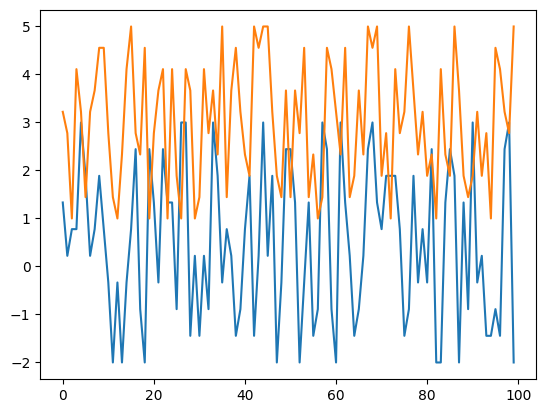

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.linspace(-2, 3, 10)   # 실수
B = np.linspace(1, 5, 10)
# A = np.arange(-2, 3, 1)    # 정수
# B = np.arange(1, 5, 1)
product = set(itertools.product(A, B))
plt.plot(list(product))

----------------------------

## 5-2 관계와 관계 표현

### [예제 5-6] 이항관계
- A＝{1, 2}이고 B＝{a, b, c}라 하자.
- R＝{(1, a), (1, b), (2, b), (2, c)}가 집합 A에서 집합 B로의 이항관계인지 확인하고
-원소들 간의 관계를 표현하라.

In [ ]:
# 방법1
import itertools

A = {1, 2}
B = {'a','b','c'}
R = {(1,'a'), (1,'b'), (2,'b'), (2,'c')}

product = set(itertools.product(A, B))

result = 'R은 집합 A에서 집합 B로의 이항관계이다'
for r in R:
    if r not in product:
        result = 'R은 집합 A에서 집합 B로의 이항관계가 아니다'
        break
print(result)

print('원소들의 관계: ')
for r in R:
    print(f'{ r[0] }R{ r[1] }', end=', ')

R은 집합 A에서 집합 B로의 이항관계이다
원소들의 관계: 
2Rb, 2Rc, 1Rb, 1Ra, 

In [ ]:
# 방법2
A = {1, 2}
B = {'a','b','c'}
R = {(1,'a'), (1,'b'), (2,'b'), (2,'c')}

product = set(itertools.product(A, B))

result = f'R={R}은 집합 A에서 집합 B로의 '
if R.issubset(product) :
    print(result + '이항관계이다')
else:
    print(result + '이항관계가 아니다')

R={(2, 'b'), (2, 'c'), (1, 'b'), (1, 'a')}은 집합 A에서 집합 B로의 이항관계이다


### [예제 5-7] : 관계 R 구하기
A = {1,2,3,4}일 때  aRb <--> a≤b로 정의되는  R의
- R의 정의역, 치역, 공역

In [ ]:
# 집합 A
A = {1, 2, 3, 4}

# 관계 R 정의: b가 a로 나누어 떨어질 때 (b % a == 0)
R = [(a, b) for a in A for b in A if a <= b]

# 정의역 (domain): A의 원소 중에서 관계 R에 포함된 모든 a 값
domain = {a for a, b in R}

# 치역 (range): B의 원소 중에서 관계 R에 포함된 모든 b 값
range_ = {b for a, b in R}

# 공역 (codomain): 집합 B 전체
codomain = A

# 결과 출력
print("관계 R:", R)
print("정의역(Domain)  :", domain)
print("치역  (Range)   :", range_)
print("공역  (Codomain):", codomain)

관계 R: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)]
정의역(Domain)  : {1, 2, 3, 4}
치역  (Range)   : {1, 2, 3, 4}
공역  (Codomain): {1, 2, 3, 4}


In [37]:
import itertools

def print_binary_relation(A, B, R):
    domain = {r[0] for r in R}
    range_ = {r[1] for r in R}
    codomain = B        # 집합 B 전체
    print("관계 R:", R)
    print("정의역(Domain)  :", domain)
    print("치역  (Range)   :", range_)
    print("공역  (Codomain):", codomain)

# 관계 R의 정의역, 치역, 공역 구하기
A = {1, 2, 3, 4}
R = set()
for r in set(itertools.product(A, A)): # 관계R의 순서쌍
    if r[0] <= r[1]:
        R.add( r )
print_binary_relation(A, A, R)   # 이항관계 출력하기
#R

관계 R: {(4, 4), (2, 4), (1, 2), (3, 4), (1, 1), (1, 4), (2, 3), (3, 3), (2, 2), (1, 3)}
정의역(Domain)  : {1, 2, 3, 4}
치역  (Range)   : {1, 2, 3, 4}
공역  (Codomain): {1, 2, 3, 4}


### [예제 5-8] : 관계 R 구하기
A＝{2, 3, 4, 7}, B＝{2, 4, 5, 6}이다. 집합 A에서 집합 B로의 관계 R은 b가 a로 나누어 떨어질 때 a R b이다. 이때 관계 R과 R의 정의역, 치역, 공역을 구하라.

In [ ]:
# 방법1
A = {2, 3, 4, 7}
B = {2, 4, 5, 6}

# 관계 R 정의: b가 a로 나누어 떨어질 때 (b % a == 0)
R = [(a, b) for a in A for b in B if b % a == 0]

# 정의역 (domain): A의 원소 중에서 관계 R에 포함된 모든 a 값
domain = {a for a, b in R}

# 치역 (range): B의 원소 중에서 관계 R에 포함된 모든 b 값
range_ = {b for a, b in R}

# 공역 (codomain): 집합 B 전체
codomain = B

# 결과 출력
print("관계 R:", R)
print("정의역(Domain)  :", domain)
print("치역  (Range)   :", range_)
print("공역  (Codomain):", codomain)

관계 R: [(2, 2), (2, 4), (2, 6), (3, 6), (4, 4)]
정의역(Domain)  : {2, 3, 4}
치역  (Range)   : {2, 4, 6}
공역  (Codomain): {2, 4, 5, 6}


In [ ]:
# 방법2
def print_binary_relation(A, B, R):
    domain = {r[0] for r in R}
    range_ = {r[1] for r in R}
    codomain = B        # 집합 B 전체
    print("관계 R:", R)
    print("정의역(Domain)  :", domain)
    print("치역  (Range)   :", range_)
    print("공역  (Codomain):", codomain)

# 관계 R의 정의역, 치역, 공역 구하기
A = {2, 3, 4, 7}
B = {2, 4, 5, 6}

R = set()
for r in set(itertools.product(A, B)): # 순서쌍
    if (r[1] % r[0])==0:  # r[1]은 r[0]로 나누어 떨어진다.
        R.add( r )

print_binary_relation(A, B, R)

관계 R: {(4, 4), (2, 4), (2, 6), (3, 6), (2, 2)}
정의역(Domain)  : {2, 3, 4}
치역  (Range)   : {2, 4, 6}
공역  (Codomain): {2, 4, 5, 6}


### [예제 5-9] 멱집합 관계 R 구하기

In [ ]:
# A의 멱집합 구하기
A = {'a'}

def power_set(s):  # 집합 s의 모든 부분집합을 구함
    power_set_list = []
    for r in range(len(s) + 1):  # 각 크기에 대해 부분집합 생성
        subsets = itertools.combinations(s, r)
        power_set_list.extend(subsets)

    return [set(x) for x in power_set_list]


# 집합 A의 멱집합
P_A = power_set(A)

# 관계 R 정의: u R v ⇔ u ⊆ v
R = [(u, v) for u in P_A for v in P_A if u.issubset(v)]

# 정의역 (domain): R에 포함된 모든 u 값
domain = {frozenset(u) for u, v in R}

# 치역 (range): R에 포함된 모든 v 값
range_ = {frozenset(v) for u, v in R}

# 공역 (codomain): P(A) 전체
codomain = P_A

# 결과 출력
print("멱집합 P(A):", P_A)
print("관계 R (u ⊆ v)  :", R)
print("정의역 (Domain)  :", domain)
print("치역   (Range)   :", range_)
print("공역   (Codomain):", codomain)


멱집합 P(A): [set(), {'a'}]
관계 R (u ⊆ v)  : [(set(), set()), (set(), {'a'}), ({'a'}, {'a'})]
정의역 (Domain)  : {frozenset(), frozenset({'a'})}
치역   (Range)   : {frozenset(), frozenset({'a'})}
공역   (Codomain): [set(), {'a'}]


### [예제 5-10] n항관계 : 4항관계

In [ ]:
# 집합 A, B, C, D 정의
A = {'C', 'P'}
B = {5, 6, 7}
C = {'이산수학', '컴파일러'}
D = {'한국', '미국'}
R = {('C', 5, '이산수학', '한국'),
     ('C', 6, '이산수학', '미국'),
     ('P', 5, '컴파일러', '한국'),
     ('P', 7, '컴파일러', '한국')}

product = set(itertools.product(A, B, C, D))

if R.issubset(product) : # 부분집합인지 확인
    print('R은 AxBxCxD의 관계이다')
else:
    print('R은 AxBxCxD의 관계가 아니다')

R은 AxBxCxD의 관계이다


### **집합 사이의 관계를 표시하는 방법**

- 서술식 방법
- **나열식 방법(순서쌍의 원소들 간의 관계 표현)**
    - 순서쌍
    - 화살표 그림(arrow diagram)
    - 관계 행렬(relation matrix)
    - 유향 그래프(directed graph)
    등

### 1.화살표 그림(arrow diagram)


- 서로 다른 두 개의 원에 각각 집합 A의 원소와 집합 B의 원소를 써넣은 후
- 𝑎∈𝐴와 𝑏∈𝐵가 관계가 있으면 𝑎로부터 𝑏로 화살표를 그리는 방법
-  ![nn](https://images.nagwa.com/figures/explainers/793120120312/1.svg)

### 2.관계 행렬(Relation Matrix)


### [예제 5-13] :  관계 행렬 표현하기
A＝{1, 2}이고 B＝{a, b, c}라 하자. 이때 R＝{(1, a), (1, b), (2, b), (2, c)}가 집합 A에서 집합 B로의 이항관계인지 확인하고, 원소들 간의 관계를 표현하라.


- **[주의!!]** 관계 행렬을 표시할 때 집합은 순서가 없기 때문에 리스트로 변환하여 처리함

In [ ]:
# 방법1 : matrix 직접 구현
A = [1, 2]
B = ['a', 'b', 'c']
R = {(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c')}

# 리스트로 표시하기
datas = []
for a in A: # 행
    data = []
    for b in B: # 열
        r = (a, b)
        if r in R:
            data.append(1)
        else:
            data.append(0)
    datas.append(data)

# 행렬로 표시하기
matrix = np.array(datas)
print('관계행렬(M):\n', matrix)

관계행렬(M):
 [[1 1 0]
 [0 1 1]]


In [57]:
# 방법2 : numy ndarray 이용
import numpy as np

def make_relation_matrix(A, B, R):
    print('관계행렬(relation_matrix): ')
    # 집합을 리스트로 변환
    if isinstance(A, set): A = list(A)
    if isinstance(B, set): B = list(B)

    # 관계행렬 초기화 (A의 크기 × B의 크기)
    relation_matrix = np.zeros((len(A), len(B)), dtype=int)

    # 관계 R에 있는 쌍들에 대해 관계행렬에 1로 표시
    for (a, b) in R:
        row = A.index(a)  # A에서 a의 인덱스를 찾음
        col = B.index(b)  # B에서 b의 인덱스를 찾음
        relation_matrix[row, col] = 1

    print(relation_matrix)
    return relation_matrix

A = [1, 2]
B = ['a', 'b', 'c']
R = {(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c')}

# 관계행렬 출력
relation_matrix =  make_relation_matrix(A, B, R)


관계행렬(relation_matrix): 
[[1 1 0]
 [0 1 1]]


### [예제 5-14] :  관계 행렬
A＝{a1, a2, a3}, B＝{b1, b2, b3, b4,}일 때, 집합 A에서 집합 B로 가는 관계 R를 관계행렬로 나타내라.         
- R＝ {(a1, b1), (a1, b4), (a2, b2), (a2, b3), (a3, b1), (a3, b3)}

In [ ]:
A = ['a1','a2','a3']
B = ['b1','b2','b3','b4']
R = {('a1','b1'),('a1','b4'),('a2','b2'),('a2','b3'),('a3','b1'),('a3','b3')}

# 관계행렬 출력
relation_matrix =  make_relation_matrix(A, B, R)
print("관계행렬: \n", relation_matrix)

관계행렬: 
 [[1 0 0 1]
 [0 1 1 0]
 [1 0 1 0]]


### [예제 5-15] :  관계 행렬
[예제 5-7〕에서 정의된 관계를 관계행렬로 나타내라.

In [ ]:
A = [1,2,3,4]
R = []
for r in set(itertools.product(A, A)): # 관계R의 순서쌍
    if r[0] <= r[1]:
        R.append( r )

# 관계행렬 출력
relation_matrix =  make_relation_matrix(A, A, R)
print("관계행렬: \n", relation_matrix)

관계행렬: 
 [[1 1 1 1]
 [0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]]


### 3.유향 그래프(directed graph)
- https://networkx.org/
- https://networkx.org/documentation/stable/auto_examples/index.html#examples-gallery

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install networkx

     ---------------------------------------- 2.0/2.0 MB 16.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### [예제 5-16] : 유향 그래프 그리기
집합 A＝{1, 2, 3, 4}에 관한 관계 R이 다음과 같을 때, R을 유향 그래프로 그려라.
- R＝{(1, 1), (1, 2), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 1)}


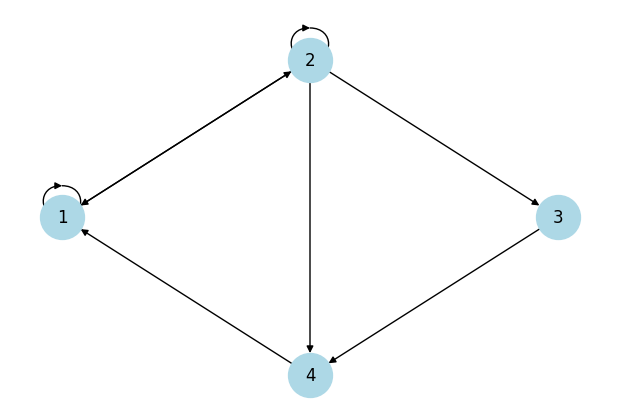

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
G = nx.DiGraph()  # DirectedGraph(유향 그래프)

A = {1,2,3,4}
R = {(1,1),(1,2),(2,1),(2,2),(2,3),(2,4),(3,4),(4,1)}

G.add_nodes_from(A)  # 노드 추가
G.add_edges_from(R)   # 간선 추가

# 노드 위치 고정 (사용자 정의 좌표)
pos = {1: (-1, 0),
       2: (0, 1),
       3: (1, 0),
       4: (0, -1)}

# 1. 위치 비고정 그래프 그리기
# nx.draw(G,with_labels=True)

# 2. 위치 고정 그래프 그리기
nx.draw(G, pos, with_labels=True,
        node_color='lightblue', node_size=1000, font_size=12)

plt.show()


- 유향그래프 그리기 함수화 하기

유향그래프(Directed Graph): 


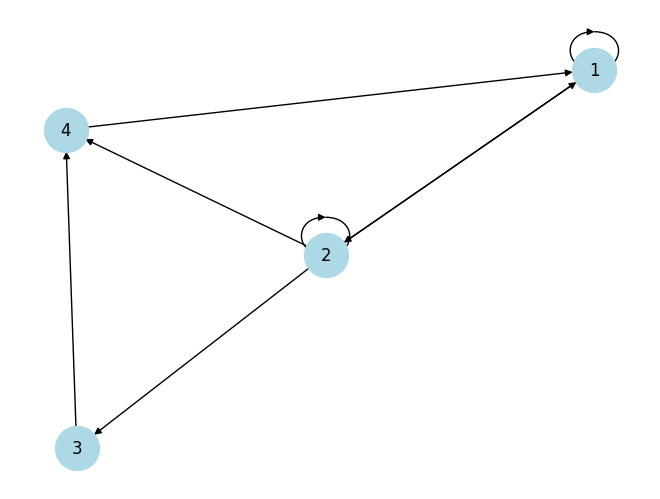

유향그래프(Directed Graph): 


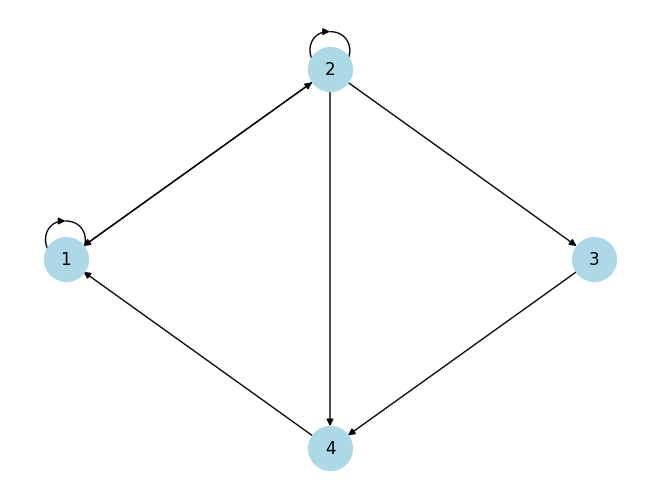

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_directed_graph(A, R, pos=False):
    print('유향그래프(Directed Graph): ')

    G = nx.DiGraph()      # DirectedGraph(유향 그래프)
    G.add_nodes_from(A)   # 노드 추가
    G.add_edges_from(R)   # 간선 추가

    if pos :  # 위치 고정 그래프 그리기
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12)
    else:     # 위치 비고정 그래프 그리기
        nx.draw(G,with_labels=True, node_color='lightblue', node_size=1000, font_size=12)
    plt.show()

A = {1,2,3,4}
R = {(1,1),(1,2),(2,1),(2,2),(2,3),(2,4),(3,4),(4,1)}
pos = {1: (-1, 0),
            2: (0, 1),
            3: (1, 0),
            4: (0, -1)}
draw_directed_graph(A, R)       # 노드 위치정보 없이 호출
draw_directed_graph(A, R, pos)  # 노드 위치정보 포함 호출

### [예제5-17] :  유향 그래프와 관계 행렬 나타내기
집합 X＝{1, 2, 3, 4, 5}에 관한 관계 R＝{(x, y) ∣ x > y}라 할 때 R을 유향 그래프와 관계행렬로 표현하라.

관계R: {(2, 1), (4, 3), (3, 1), (5, 4), (5, 1), (4, 2), (5, 3), (3, 2), (4, 1), (5, 2)}
관계행렬(relation_matrix): 
[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]]
유향그래프(Directed Graph): 


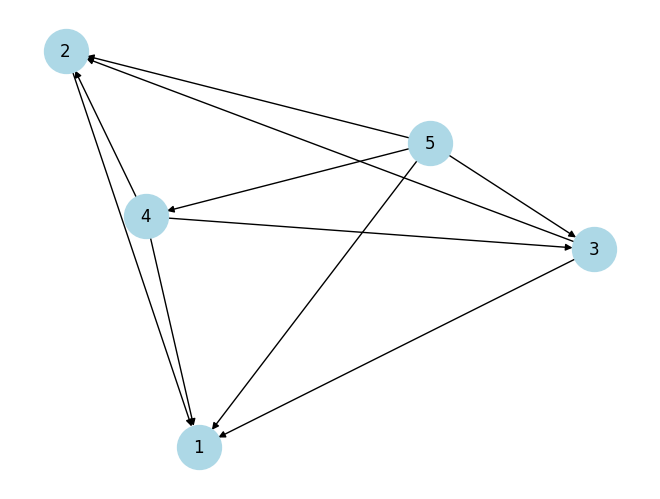

In [59]:
X = {1, 2, 3, 4, 5}
R = set()

def make_relation(A, B): #관계(R) 구하기:순서쌍 구하기
    for r in set(itertools.product(X, X)): # 관계R의 순서쌍
        if r[0] > r[1]:  # 관계 조건
            R.add( r )

    print(f'관계R: {R}')
    return R

# 1.관계(R) 구하기:순서쌍 구하기
R = make_relation(A, B)

# 2. 관계행렬 구하기
make_relation_matrix(X, X, R)

# 3. 유향 그래프 그리기
draw_directed_graph(X, R)       # 노드 위치정보 없이 호출


유향그래프(Directed Graph): 


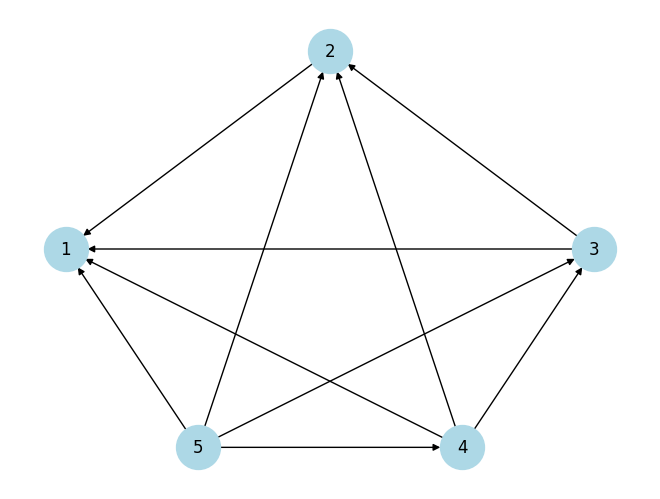

In [ ]:
pos = {1:(-2,0), 2:(0,1), 3:(2,0), 4:(1,-1), 5:(-1,-1)}
draw_directed_graph(A, R, pos)  # 노드 위치정보 포함 호출

------------------------

## 5-3. 경로 (Path)

### [예제 5-19] : 유향 그래프로부터 경로 찾기
A＝{1, 2, 3, 4, 5}이고 유향 그래프가 다음과 같을 때 관계 R로부터 길이가 2인 경로 모두 찾기

In [ ]:
A = {1,2,3,4,5}
R = {(1,2),(1,3),(2,2),(2,3),(2,4),(3,4),(4,5),(5,2)}

# 길이가 2인 경로 찾기
length_2_paths = []

# 관계 R에서 길이가 2인 경로를 찾음
for (x, y1) in R:
    for (y2, z) in R:
        if y1 == y2:  # 두 관계의 중간점이 같다면 길이가 2인 경로
            length_2_paths.append((x, z))

length_2_paths = set(length_2_paths)  # 중복 순서쌍 제거
# 결과 출력
print("길이가 2인 경로(R^2):", length_2_paths)
print("길이가 2인 경로의 개수:", len(length_2_paths))

길이가 2인 경로들: {(2, 4), (1, 2), (5, 4), (1, 4), (4, 2), (2, 3), (2, 2), (5, 3), (2, 5), (1, 3), (3, 5), (5, 2)}
길이가 2인 경로 길이: 12


- 길이가 n인 관계 $R^n$ 찾기

In [ ]:
# 집합 A와 관계 R 정의
A = {1,2,3,4,5}
R = {(1,2),(1,3),(2,2),(2,3),(2,4),(3,4),(4,5),(5,2)}

# 경로를 재귀적으로 확장하여 길이가 n인 경로를 찾는 함수
def find_paths_of_length_n(R, n):
    # 초기 경로는 길이가 1인 관계 자체임
    if n == 1:
        return list(R)

    # n-1 길이의 경로를 먼저 찾음
    shorter_paths = find_paths_of_length_n(R, n - 1)
    extended_paths = []

    # n-1 길이의 경로에 대해, 이를 길이가 n으로 확장
    for (x, y1) in shorter_paths:
        for (y2, z) in R:
            if y1 == y2:
                extended_paths.append((x, z))

    return extended_paths

# 길이가 n인 경로 찾기
n = 2  # 원하는 경로의 길이
paths_of_length_n = set(find_paths_of_length_n(R, n))

# 결과 출력
print(f"길이가 {n}인 경로들:", paths_of_length_n)
print(f"길이가 {n}인 경로 개수:", len(paths_of_length_n))


길이가 2인 경로들: {(2, 4), (1, 2), (5, 4), (1, 4), (4, 2), (2, 3), (2, 2), (5, 3), (2, 5), (1, 3), (3, 5), (5, 2)}
길이가 2인 경로 개수: 12


### [예제 5-20] 연결관계 (connectivity relation) R∞

- 연결관계(connectivity relation) R∞

In [106]:
# 집합 A와 관계 R 정의
A = {'a','b','c','d','e'}  #집합은 순서가 없기 때문에 리스트로 변환하여 처리함
R = {('a','a'),('a','b'),('b','c'),('c','d'),('c','e'),('d','e')}

# 경로를 통해 연결 관계가 있는지 확인하는 함수
def is_connected(R, start, end, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)

    # 바로 연결된 경우
    if start == end:
        return True

    # 경로를 확장하며 연결 여부 확인
    for (x, y) in R:
        if x == start and y not in visited:
            if is_connected(R, y, end, visited):
                return True

    return False

# 연결관계가 있는 모든 순서쌍 찾기
def find_connected_pairs(A, R):
    connected_pairs = []
    for start in A:
        for end in A:
            if start != end and is_connected(R, start, end):
                connected_pairs.append((start, end))
    connected_pairs = set(connected_pairs) | R   # 기존 관계와 합집합시키기(반사포함)
    return connected_pairs

# 연결관계가 있는 모든 순서쌍 출력
connected_pairs = find_connected_pairs(A, R)

print("연결관계가 있는 모든 순서쌍:")
for pair in connected_pairs:
    print(pair)


연결관계가 있는 모든 순서쌍:
('b', 'd')
('b', 'c')
('b', 'e')
('c', 'e')
('a', 'c')
('a', 'e')
('a', 'd')
('a', 'a')
('a', 'b')
('c', 'd')
('d', 'e')


### [예제 5-21] : 부울곱(boolean product)을 이용해 $R^2$ 경로 찾기
집합 A＝{a, b, c, d, e}에 관한 관계 R＝{(a, a), (a, b), (b, c), (c, d), (c, e), (d, e)}에 대해 다음을 구하라.   
- (a) $R^2$


In [20]:
A = {'a','b','c','d','e'}  #집합은 순서가 없기 때문에 리스트로 변환하여 처리함
R = {('a','a'),('a','b'),('b','c'),('c','d'),('c','e'),('d','e')}

# 길이가 2인 경로 찾기
length_2_paths = []

# 관계 R에서 길이가 2인 경로를 찾음
for (x, y1) in R:
    for (y2, z) in R:
        if y1 == y2:  # 두 관계의 중간점이 같다면 길이가 2인 경로
            length_2_paths.append((x, z))

length_2_paths = set(length_2_paths)  # 중복 순서쌍 제거
# 결과 출력
print("길이가 2인 경로(R^2):", length_2_paths)
print("길이가 2인 경로의 개수:", len(length_2_paths))

길이가 2인 경로(R^2): {('b', 'd'), ('b', 'e'), ('c', 'e'), ('a', 'c'), ('a', 'b'), ('a', 'a')}
길이가 2인 경로의 개수: 6


- 부울곱 이용하는 방법

In [101]:
A = ['a','b','c','d','e']  #집합은 순서가 없기 때문에 리스트로 변환하여 처리함
R = [('a','a'),('a','b'),('b','c'),('c','d'),('c','e'),('d','e')]


# 길이가 2인 관계 행렬의 부울곱(논리곱)
def getBooleanProduct(M_A, M_B):
    print('부울곱(boolean product): ')
    # return M_A @ M_B    # np.dot(x,y)
    return np.logical_and(M_A, M_B).astype(int)


# 부울곱을 이용해 길이가 2인 경로
def getBooleanProductMatrix(A, matrix):
    R2 = list()
    row, col = matrix.shape  # 행렬 길이 정보(행렬의 모양)
    for i in range(row):
        for j in range(col):
            if matrix[i][j]>=1:
                R2.append((A[i],A[j]))
    return set(R2)


# 관계 행렬 만들기
relation_matrix =  make_relation_matrix(A, A, R)

# 관계 행렬의 부울곱 만들기
boolean_product_matrix = getBooleanProduct(relation_matrix, relation_matrix)
print(boolean_product_matrix)

# 부울곱을 이용해 길이가 2인 경로 출력하기
R2 = getBooleanProductMatrix(A, boolean_product_matrix)
print("길이가 2인 R의 경로(R2): ")
print(R2)

관계행렬(relation_matrix): 
[[1 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]
부울곱(boolean product): 
[[1 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]
길이가 2인 R의 경로(R2): 
{('d', 'e'), ('b', 'c'), ('a', 'a'), ('a', 'b'), ('c', 'd'), ('c', 'e')}


### [예제 5-22] 경로의 합성(composition of paths)
집합 A={1, 2, 3, 4, 5, 6}의 관계 R에 대한 유향 그래프가 있을 때 두 경로 𝜋1 = [1, 2, 3]과 𝜋2 = [3, 5, 6, 2, 4]에 대해 합성 𝜋1$\centerdot$𝜋2 을 구하라
- 𝜋1의 끝나는 정점과 𝜋2의 시작 정점이 같을 때만 가능
- 𝜋1에 의해 이동한 다음, 그 결과를 𝜋2에서 다시 이동시키는 방식으로 계산

In [32]:
# 집합A, 경로 π1과 π2 정의
pi1 = [1, 2, 3]
pi2 = [3, 5, 6, 2, 4]

# 경로 합성 함수 정의
def compose_paths(pi1, pi2):
    # 합성된 경로 초기화 (π1의 경로 복사)
    composed_path = pi1[:]

    # π1의 마지막 요소에서 π2의 경로 시작
    start = pi1[-1]

    # π2에서 경로를 추가
    idx = pi2.index(start)  # π2에서 start가 시작되는 인덱스 찾기
    composed_path += pi2[idx+1:]  # π2의 나머지 경로 추가

    return composed_path

# 경로 합성 구하기
composed_path = compose_paths(pi1, pi2)

# 결과 출력
print("경로 π1∙π2:", composed_path)

경로 π1∙π2: [1, 2, 3, 5, 6, 2, 4]


------------------------------

## 5-4. 관계의 성질
- 반사 관계(reflexive), 비반사 관계(irreflexive) :
- 대칭 관계(symmetric), 비대칭 관계(asymmetric), 반대칭 관계(antisymmetric) :
- 추이 관계(transitive)
- 동치 관계(equivalence): 반사 & 대칭 & 추이

### [예제 5-24]: 반사관계와 비반사관계 확인
- (a) A＝{1, 2, 3}, R＝{(a, b)∈A×A | a ≤ b}일 때, R이 반사관계임을 보여라.
- (b) A＝{1, 2, 3}, R＝{(a, b)∈A×A | a ≠ b}일 때, R이 비반사관계임을 보여라.  
- (c) A＝{1, 2, 3}, R＝{(1, 1), (1, 2), (2, 2), (3, 2)}일 때, R이 반사관계인지, 비반사관계인지 판단하라.  


관계R: {(1, 2), (1, 1), (2, 3), (3, 3), (2, 2), (1, 3)}
관계행렬(relation_matrix): 
[[1 1 1]
 [0 1 1]
 [0 0 1]]
유향그래프(Directed Graph): 


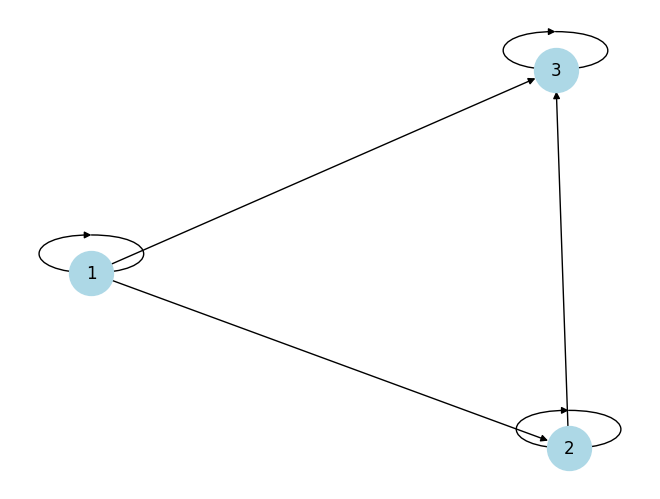


관계 R은 반사적 관계인가?: True
관계 R은 비반사적 관계인가?: False


In [64]:
# (a) A＝{1, 2, 3}, R＝{(a, b)∈A×A | a ≤ b}일 때, R이 반사관계임을 보여라.
import itertools

A = {1,2,3}

# 1.관계(R) 구하기:순서쌍 구하기
R = {r for r in set(itertools.product(A, A)) if r[0] <= r[1] }
print(f'관계R: {R}')

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 반사 및 비반사 관계 검증
def check_reflexivity(A, R):
    reflexive = True
    irreflexive = True

    for a in A:
        if (a, a) in R:  # (a, a)가 R에 존재하면 반사적
            irreflexive = False  # 비반사일 수 없음
        else:
            reflexive = False  # 반사적이지 않음

    return reflexive, irreflexive

reflexive, irreflexive = check_reflexivity(A, R)
print("\n관계 R은 반사적 관계인가?:", reflexive)
print("관계 R은 비반사적 관계인가?:", irreflexive)

관계R: {(1, 2), (2, 1), (3, 1), (2, 3), (3, 2), (1, 3)}
관계행렬(relation_matrix): 
[[0 1 1]
 [1 0 1]
 [1 1 0]]
유향그래프(Directed Graph): 


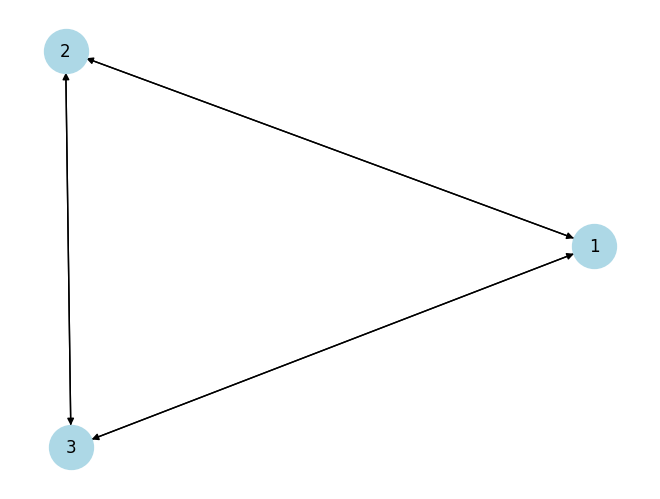


관계 R은 반사적 관계인가?: False
관계 R은 비반사적 관계인가?: True


In [65]:
# (b) A＝{1, 2, 3}, R＝{(a, b)∈A×A | a ≠ b}일 때, R이 비반사관계임을 보여라.

A = {1,2,3}

# 1.관계(R) 구하기:순서쌍 구하기
R = {r for r in set(itertools.product(A, A)) if r[0] != r[1] }
print(f'관계R: {R}')

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 반사 및 비반사 관계 검증
reflexive, irreflexive = check_reflexivity(A, R)
print("\n관계 R은 반사적 관계인가?:", reflexive)
print("관계 R은 비반사적 관계인가?:", irreflexive)

관계R: {(1, 1), (1, 2), (3, 2), (2, 2)}
관계행렬(relation_matrix): 
[[1 1 0]
 [0 1 0]
 [0 1 0]]
유향그래프(Directed Graph): 


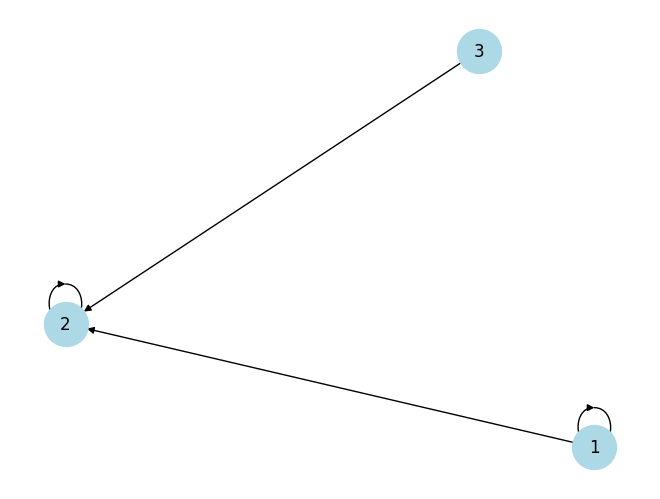


관계 R은 반사적 관계인가?: False
관계 R은 비반사적 관계인가?: False


In [66]:
# (c) A＝{1, 2, 3}, R＝{(1, 1), (1, 2), (2, 2), (3, 2)}일 때, R이 반사관계인지,비반사관계인지 판단하라

A = {1,2,3}

# 1.관계(R) 구하기:순서쌍 구하기
R = {(1, 1), (1, 2), (2, 2), (3, 2)}
print(f'관계R: {R}')

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 반사 및 비반사 관계 검증
reflexive, irreflexive = check_reflexivity(A, R)
print("\n관계 R은 반사적 관계인가?:", reflexive)
print("관계 R은 비반사적 관계인가?:", irreflexive)

### [예제 5-26]: 대칭관계와 비대칭관계 확인 - 관계 행렬 확인
A＝{1, 2, 3, 4}, R＝{(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3)}에 대해 관계 R을 유향 그래프와 관계행렬로 표현하고, R이 반사관계, 비반사관계, 대칭관계, 비대칭관계, 반대칭관계인지를 판단하라.

관계행렬(relation_matrix): 
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
유향그래프(Directed Graph): 


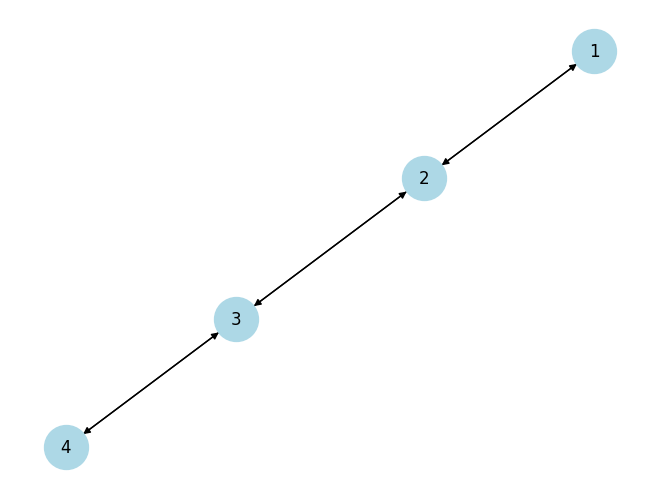


관계 R은 대칭인가?: True
관계 R은 반대칭인가?: False
관계 R은 비대칭인가?: False


In [63]:
A = [1,2,3,4]  #집합은 순서가 없기 때문에 리스트로 변환하여 처리함
R = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3)]

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 반사 및 비반사 관계 검증
reflexive, irreflexive = check_reflexivity(A, R)
print("\n관계 R은 반사적 관계인가?:", reflexive)
print("관계 R은 비반사적 관계인가?:", irreflexive)

# 5. 대칭관계/비대칭관계/반대칭관계
def check_symmetry(R):
    symmetric = True
    antisymmetric = True
    asymmetric = True

    for a, b in R:
        if (b, a) in R:  # 대칭 관계가 있는 경우
            asymmetric = False  # 비대칭일 수 없음
        else:
            symmetric = False  # 대칭이 아님

        if a != b and (b, a) in R:  # 반대칭 검증
            antisymmetric = False

    return symmetric, antisymmetric, asymmetric

symmetric, antisymmetric, asymmetric = check_symmetry(R)
print("\n관계 R은 대칭인가?:", symmetric)
print("관계 R은 반대칭인가?:", antisymmetric)
print("관계 R은 비대칭인가?:", asymmetric)

### [예제 5-30] : 추이관계
A＝{1, 2, 3, 4}, R＝{(a, b)∈A×A | a<b}일 때, R을 유향 그래프와 관계행렬로 표현하고, 추이관계임을 보여라.  

- 추이관계 : $\exists   a, b, c \in A에 대해 _{a}R_{b} 이고  _{b}R_{c} $

  

관계R: {(2, 4), (1, 2), (3, 4), (1, 4), (2, 3), (1, 3)}
관계행렬(relation_matrix): 
[[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]
유향그래프(Directed Graph): 


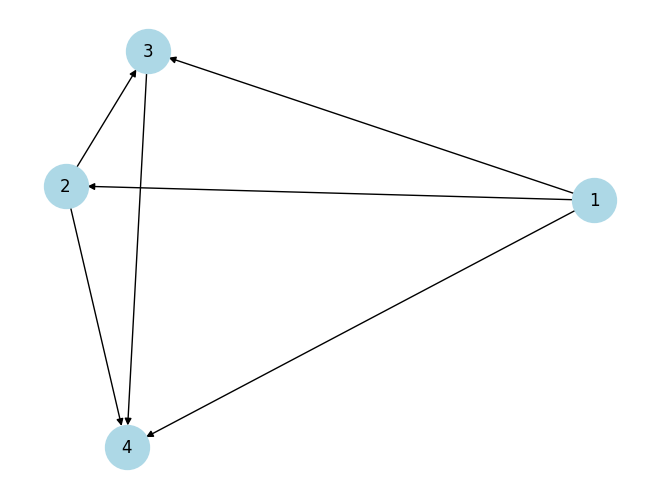

관계 R은 추이적 관계인가?: True


In [60]:
A = {1,2,3,4}

# 1.관계(R) 구하기:순서쌍 구하기
R = {r for r in set(itertools.product(A, A)) if r[0] < r[1] }
print(f'관계R: {R}')

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 추이적 관계 검증
def is_transitive(R):
    for (a, b1) in R:
        for (b2, c) in R:
            if b1 == b2 and (a, c) not in R:
                return False
    return True

transitive = is_transitive(R)
print("관계 R은 추이적 관계인가?:", transitive)

### [예제 5-31] : 추이관계
A＝{1, 2, 3}, R＝ {(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 3)}에 대해 R을 유향 그래프와 관계행렬로 표현하고, R이 반사관계, 비반사관계, 대칭관계, 비대칭관계, 반대칭관계, 추이관계인지를 판단하라.

관계R: {(2, 3), (1, 2), (3, 3), (2, 1), (2, 2), (1, 1), (1, 3)}
관계행렬(relation_matrix): 
[[1 1 1]
 [1 1 1]
 [0 0 1]]
유향그래프(Directed Graph): 


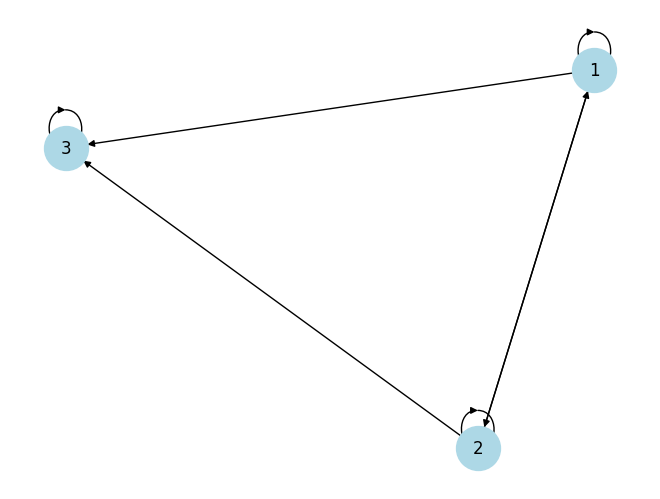


관계 R은 반사적 관계인가?: True
관계 R은 비반사적 관계인가?: False

관계 R은 대칭인가?: False
관계 R은 반대칭인가?: False
관계 R은 비대칭인가?: False

관계 R은 추이적 관계인가?: True


In [70]:
A = {1,2,3}
R = {(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 3)}  # 관계(R)
print(f'관계R: {R}')

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 관계 검증
# - 반사 및 비반사 관계 검증
reflexive, irreflexive = check_reflexivity(A, R)
print("\n관계 R은 반사적 관계인가?:", reflexive)
print("관계 R은 비반사적 관계인가?:", irreflexive)

# - 대칭관계/비대칭관계/반대칭관계
symmetric, antisymmetric, asymmetric = check_symmetry(R)
print("\n관계 R은 대칭인가?:", symmetric)
print("관계 R은 반대칭인가?:", antisymmetric)
print("관계 R은 비대칭인가?:", asymmetric)

# - 추이관계
transitive = is_transitive(R)
print("\n관계 R은 추이적 관계인가?:", transitive)

### [예제5-32] 동치관계 : 반사관계 & 대칭관계 & 추이관계
A＝{1, 2, 3, 4} R＝{(1, 1), (1, 2), (2, 1), (2, 2), (3, 3), (3, 4), (4, 3), (4, 4)}에 대해 R을 유향 그래프와 관계행렬로 표현하고, R이 동치관계임을 보여라.


관계R: {(4, 4), (1, 2), (2, 1), (3, 4), (4, 3), (1, 1), (3, 3), (2, 2)}
관계행렬(relation_matrix): 
[[1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]]
유향그래프(Directed Graph): 


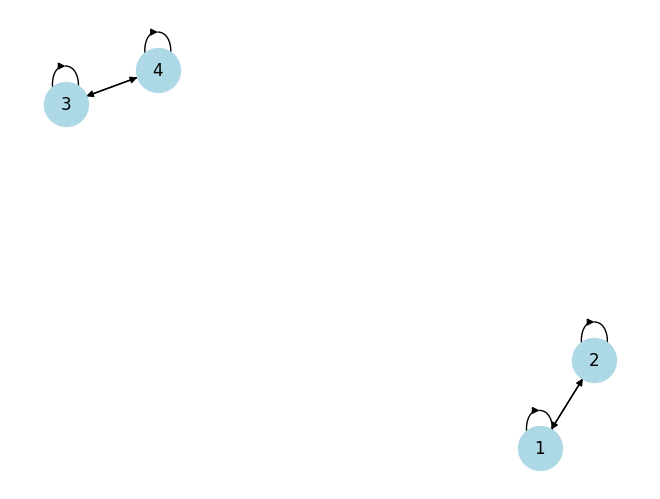


관계 R은 동치인가?: True


In [72]:
A = {1,2,3,4}
R = {(1, 1), (1, 2), (2, 1), (2, 2), (3, 3), (3, 4), (4, 3), (4, 4)}  # 관계(R)
print(f'관계R: {R}')

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 동치 검증
def check_equivalence(reflexive, symmetri, transitive):
    equivalence = False
    if reflexive & symmetric & transitive :
        equivalence = True
    return equivalence

reflexive, irreflexive = check_reflexivity(A, R)         # 반사 및 비반사 관계 검증
symmetric, antisymmetric, asymmetric = check_symmetry(R) # 대칭관계/비대칭관계/반대칭관계
transitive = is_transitive(R)                            #추이관계
equivalence = check_equivalence(reflexive, symmetric, transitive)  # 동치관계
print("\n관계 R은 동치인가?:", equivalence)



### [예제 5-35] : 동치류(equivalence class) : 반사관계 & 대칭관계 & 추이관계에서
집합 A={1, 2, 3, 4, 5}, R = {(1, 1), (1, 5), (2, 2), (2, 3), (3, 2), (3, 3), (4, 4), (5, 1), (5, 5)}에 대해 동치류 [1], [2], [3], [4], [5]를 구하라

- 동치류 : $ a \in A$에 대해 집합 $[a]$ = {$ x \in A | xRa$}를 a에 관한 동치류(equivalence class)라고 하고 $[a]$로 표기한다.


관계행렬(relation_matrix): 
[[1 0 0 0 1]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 1]]
유향그래프(Directed Graph): 


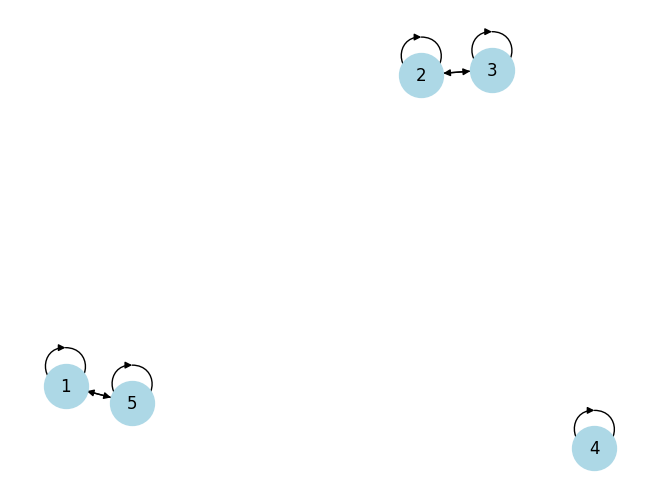

동치류 [1]: {1, 5}
동치류 [2]: {2, 3}
동치류 [3]: {2, 3}
동치류 [4]: {4}
동치류 [5]: {1, 5}


In [75]:
# 집합 A와 관계 R 정의
A = {1, 2, 3, 4, 5}
R = {(1, 1), (1, 5), (2, 2), (2, 3), (3, 2), (3, 3), (4, 4), (5, 1), (5, 5)}

# 2. 관계행렬 구하기
make_relation_matrix(A, A, R)

# 3. 유향 그래프 그리기
draw_directed_graph(A, R)

# 4. 동치류 구하기
def equivalence_class(x, R):
    eq_class = {y for (a, b) in R if a == x for y in A if (b, y) in R}
    return eq_class

# 집합 A의 각 원소에 대해 동치류 구하기
for a in A:
    eq_class = equivalence_class(a, R)
    print(f"동치류 [{a}]:", eq_class)


--------------------------

## 5-5: 역관계와 합성 관계

### [예제 5-36] : 역관계($R^{-1}$ inverse relation)와 여관계($\bar{R}$ complementary relation)
A={a, b, c}, B={1, 2, 3}일 때 A에서 B로의 관계 R과 S에 대해 $\bar{R}$,  $R^{-1}$ , R∩S, R∪S를 구하라.
- R={(a, 1), (b, 1), (b, 2), (b, 3), (c, 2)},
- S={(b, 1), (b, 3), (c, 2)}

In [78]:
A = {'a', 'b', 'c'}
B = {1, 2, 3}
R = {('a', 1), ('b', 1), ('b', 2), ('b', 3), ('c', 2)}
S = {('b', 1), ('b', 3), ('c', 2)}

# A × B (전체 가능한 관계)
AxB = {(a, b) for a in A for b in B}

# 1. 여관계 (complementary relation)
R_complement = AxB - R
S_complement = AxB - S

# 2. 역관계 (inverse relation)
R_inverse = {(b, a) for (a, b) in R}
S_inverse = {(b, a) for (a, b) in S}

# 3. 교집합 (R ∩ S)
R_intersection_S = R & S

# 4. 합집합 (R ∪ S)
R_union_S = R | S

# 결과 출력
print("여관계 R_complement:", R_complement)
print("역관계 R_inverse:", R_inverse)
print("교집합 R ∩ S:", R_intersection_S)
print("합집합 R ∪ S:", R_union_S)


여관계 R_complement: {('c', 3), ('a', 2), ('a', 3), ('c', 1)}
역관계 R_inverse: {(1, 'b'), (1, 'a'), (2, 'b'), (3, 'b'), (2, 'c')}
교집합 R ∩ S: {('b', 1), ('b', 3), ('c', 2)}
합집합 R ∪ S: {('b', 1), ('a', 1), ('b', 2), ('b', 3), ('c', 2)}


### [예제 5-38] : 역관계와 여관계 - 관계행렬 이용

In [79]:
A = {1,2,3}
R_matrix = np.array([[1,0,1],[0,1,1],[0,0,1]])
S_matrix = np.array([[0,1,1],[1,1,0],[0,1,0]])

# 1. 관계행렬 생성 함수
def relation_matrix(A, B, relation):
    matrix = np.zeros((len(A), len(B)), dtype=int)
    for (a, b) in relation:
        i = A.index(a)
        j = B.index(b)
        matrix[i, j] = 1
    return matrix

# 2. 여관계 행렬 구하는 함수 (전체 행렬에서 관계를 뺌)
def complement_matrix(A, B, relation_matrix):
    complete_matrix = np.ones((len(A), len(B)), dtype=int)
    return complete_matrix - relation_matrix

# 3. 역관계 행렬 구하는 함수 (전치 행렬 이용)
def inverse_matrix(relation_matrix):
    return relation_matrix.T

# 4. 교집합 행렬 구하는 함수
def intersection_matrix(matrix1, matrix2):
    return np.logical_and(matrix1, matrix2).astype(int)

# 5. 합집합 행렬 구하는 함수
def union_matrix(matrix1, matrix2):
    return np.logical_or(matrix1, matrix2).astype(int)


# 여관계 구하기
R_complement_matrix = complement_matrix(A, A, R_matrix)
S_complement_matrix = complement_matrix(A, A, S_matrix)

# 역관계 구하기
R_inverse_matrix = inverse_matrix(R_matrix)
S_inverse_matrix = inverse_matrix(S_matrix)

# 교집합 구하기
R_intersection_S_matrix = intersection_matrix(R_matrix, S_matrix)

# 합집합 구하기
R_union_S_matrix = union_matrix(R_matrix, S_matrix)

# 결과 출력
print("관계행렬 R:")
print(R_matrix)

print("\n관계행렬 S:")
print(S_matrix)

print("\n여관계행렬 R_complement:")
print(R_complement_matrix)

print("\n역관계행렬 R_inverse:")
print(R_inverse_matrix)

print("\n교집합 행렬 R ∩ S:")
print(R_intersection_S_matrix)

print("\n합집합 행렬 R ∪ S:")
print(R_union_S_matrix)


관계행렬 R:
[[1 0 1]
 [0 1 1]
 [0 0 1]]

관계행렬 S:
[[0 1 1]
 [1 1 0]
 [0 1 0]]

여관계행렬 R_complement:
[[0 1 0]
 [1 0 0]
 [1 1 0]]

역관계행렬 R_inverse:
[[1 0 0]
 [0 1 0]
 [1 1 1]]

교집합 행렬 R ∩ S:
[[0 0 1]
 [0 1 0]
 [0 0 0]]

합집합 행렬 R ∪ S:
[[1 1 1]
 [1 1 1]
 [0 1 1]]


### [예제 5-40] : 합성관계
- 집합 A, B, C에 대해서 관계 R은 A에서 B로의 관계이고, S는 B에서 C로의 관계라고 할 때
- **R의 공역과 S의 정의역이 같은 집합인 경우에만 두 관계의 합성이 가능**하다.
- A={1, 2, 3, 4}에 관한 관계 R과 S가 다음과 같을 때, 합성관계 S∘R를 구하라.  
    - R = {(1, 1), (1, 2), (1, 3), (2, 4), (3, 2)}
    - S = {(1, 3), (1, 4), (2, 3), (3, 1), (4, 1)}


In [80]:
A = {1, 2, 3}
R = {(1, 1), (1, 2), (1, 3), (2, 4), (3, 2)}
S = {(1, 3), (1, 4), (2, 3), (3, 1), (4, 1)}

# 합성 관계 S ∘ R 구하는 함수
def compose_relations(R, S):
    composition = set()
    for (a, b1) in R:
        for (b2, c) in S:
            if b1 == b2:  # R의 출력과 S의 입력이 같다면 합성 가능
                composition.add((a, c))
    return composition

# 합성 관계 S ∘ R 구하기
S_composed_R = compose_relations(R, S)

# 결과 출력
print("합성 관계 S ∘ R:", S_composed_R)


합성 관계 S ∘ R: {(2, 1), (1, 1), (1, 4), (3, 3), (1, 3)}


### [예제 5-42] : 합성관계 - 관계행렬 이용

In [97]:
A = {'a','b','c'}
R_matrix = np.array([[1,0,1],[1,1,1],[0,1,0]])
S_matrix = np.array([[1,0,0],[0,1,1],[1,0,1]])


# 2. 관계행렬을 이용한 합성관계 (행렬 곱 수행)
def compose_matrices(R_matrix, S_matrix):
    n = len(R_matrix)
    composed_matrix = np.zeros((n, n), dtype=int)

    for i in range(n):
        for j in range(n):
            for k in range(n):
                composed_matrix[i, j] = composed_matrix[i, j] or (R_matrix[i, k] and S_matrix[k, j])

    return composed_matrix

# 3. 합성관계를 행렬에서 다시 튜플로 변환하는 함수
def matrix_to_relation(A, matrix):
    if isinstance(A, set): A = list(A) # 집합이면 리스트로 변환
    relation = set()
    n = len(A)
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                relation.add((A[i], A[j]))
    return relation


# 관계행렬 출력
print("관계행렬 R:")
print(R_matrix)

print("\n관계행렬 S:")
print(S_matrix)

# 합성관계 행렬 구하기
S_composed_R_matrix = compose_matrices(R_matrix, S_matrix)
print("\n합성관계 S ∘ R 행렬:")
print(S_composed_R_matrix)

# 합성관계 행렬을 다시 튜플로 변환
S_composed_R_relation = matrix_to_relation(A, S_composed_R_matrix)
print("\n합성 관계 S ∘ R:")
print(S_composed_R_relation)


관계행렬 R:
[[1 0 1]
 [1 1 1]
 [0 1 0]]

관계행렬 S:
[[1 0 0]
 [0 1 1]
 [1 0 1]]

합성관계 S ∘ R 행렬:
[[1 0 1]
 [1 1 1]
 [0 1 1]]

합성 관계 S ∘ R:
{('c', 'a'), ('b', 'b'), ('b', 'c'), ('b', 'a'), ('a', 'a'), ('a', 'b'), ('c', 'c')}


### [예제 5-45] : 합성관계 - 부울곱 이용

In [98]:
# 부울 곱을 사용하여 합성관계 구하기
def boolean_multiply(R_matrix, S_matrix):
    n = len(R_matrix)
    result_matrix = np.zeros((n, n), dtype=bool)

    # 부울 곱 연산: 논리적 AND와 OR 적용
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result_matrix[i, j] = result_matrix[i, j] or (R_matrix[i, k] and S_matrix[k, j])

    return result_matrix

# 부울 곱으로 합성관계 구하기
S_composed_R_matrix = np.logical_and(R_matrix, S_matrix)
S_composed_R_matrix = boolean_multiply(R_matrix, S_matrix)

# 합성관계 행렬 출력
print("\n합성관계 S ∘ R 행렬:")
print(S_composed_R_matrix.astype(int))  # 부울 행렬을 0과 1로 출력



합성관계 S ∘ R 행렬:
[[1 0 1]
 [1 1 1]
 [0 1 1]]


-------------------------------------

## 5-6: 연결 관계와 와샬 알고리즘

### [예제 5-44] 반사폐포 구하기
- 주어진 집합과 관계에서 반사관계를 만족하는 관계(순서쌍) 구하기 : **주대각성분이 1이 되도록(or 자신의 노드에서 순환)**
- [방법] 현재 관계 R에서 새로운 관계 추가하기

In [107]:
# 집합 A와 관계 R 정의
A = {1, 2, 3}
R = {(1, 1), (1, 3), (2, 1), (3, 2)}

# 반사 폐포를 구하는 함수
def reflexive_closure(A, R):
    closure = R.copy()
    for a in A:
        if (a, a) not in closure:
            closure.add((a, a))  # 반사 관계 추가
    return closure

# 반사 폐포 구하기
R1 = reflexive_closure(A, R)

# 결과 출력
print("반사 폐포 R1:")
print(R1)


반사 폐포 R1:
{(2, 1), (1, 1), (3, 3), (2, 2), (3, 2), (1, 3)}


### [예제 5-46] 대칭폐포 구하기
- 주어진 집합과 관계에서 대칭관계를 만족하는 관계(순서쌍) 구하기 : **(a,b)∈R이면 (b,a)∈R1이 성립하도록 만든다.**
- [방법] 현재 관계 R에서 새로운 관계 추가하기

In [108]:
# 집합 A와 관계 R 정의
A = {1, 2, 3}
R = {(1, 1), (1, 3), (2, 1), (3, 2)}

# 대칭 폐포를 구하는 함수
def symmetric_closure(R):
    closure = R.copy()
    for (a, b) in R:
        if (b, a) not in closure:
            closure.add((b, a))  # 대칭 관계 추가
    return closure

# 대칭 폐포 구하기
R1 = symmetric_closure(R)

# 결과 출력
print("대칭 폐포 R1:")
print(R1)


대칭 폐포 R1:
{(1, 2), (2, 1), (3, 1), (1, 1), (2, 3), (3, 2), (1, 3)}


### [예제 5-48] 추이폐포 구하기

In [109]:
import numpy as np

# 집합 A와 관계 R 정의
A = [1, 2, 3, 4]
R = {(1, 2), (2, 1), (2, 3), (3, 4)}

# 1. 관계행렬 생성 함수
def relation_matrix(A, relation):
    n = len(A)
    matrix = np.zeros((n, n), dtype=int)
    for (a, b) in relation:
        i = A.index(a)
        j = A.index(b)
        matrix[i, j] = 1
    return matrix

# 2. Warshall 알고리즘을 사용하여 추이 폐포 구하기
# - (a,b)∈R이고 (b,c)∈R이면, (a,c)∈R1이 성립하도록 만든다.
def transitive_closure(matrix):
    n = len(matrix)
    closure = matrix.copy()

    for k in range(n):
        for i in range(n):
            for j in range(n):
                closure[i, j] = closure[i, j] or (closure[i, k] and closure[k, j])

    return closure

# 3. 행렬을 관계(튜플)로 변환하는 함수
def matrix_to_relation(A, matrix):
    relation = set()
    n = len(A)
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                relation.add((A[i], A[j]))
    return relation

# 관계행렬 R 구하기
R_matrix = relation_matrix(A, R)
print("관계행렬 R:")
print(R_matrix)

# Warshall 알고리즘으로 추이 폐포 구하기
R_transitive_closure_matrix = transitive_closure(R_matrix)
print("\nR의 추이 폐포 (R1) 행렬:")
print(R_transitive_closure_matrix)

# 추이 폐포 행렬을 다시 튜플로 변환
R1 = matrix_to_relation(A, R_transitive_closure_matrix)
print("\n추이 폐포 R1:")
print(R1)


관계행렬 R:
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]

R의 추이 폐포 (R1) 행렬:
[[1 1 1 1]
 [1 1 1 1]
 [0 0 0 1]
 [0 0 0 0]]

추이 폐포 R1:
{(2, 4), (1, 2), (2, 1), (3, 4), (1, 1), (1, 4), (2, 3), (2, 2), (1, 3)}


### [예제 5-50] 와샬 알고리즘으로 연결관계 구하기
A={1, 2, 3, 4}이고 R={(1, 2), (2, 1), (2, 3), (3, 4)}일 때 와샬 알고리즘을 이용해 연결관계를 구하라

In [112]:
import numpy as np

# 집합 A와 관계 R 정의
A = [1, 2, 3, 4]
R = {(1, 2), (2, 1), (2, 3), (3, 4)}

# 1. 관계행렬 생성 함수
def relation_matrix(A, relation):
    n = len(A)
    matrix = np.zeros((n, n), dtype=int)
    for (a, b) in relation:
        i = A.index(a)
        j = A.index(b)
        matrix[i, j] = 1
    return matrix

# 2. Warshall 알고리즘을 사용하여 추이 폐포 구하기
# - (a,b)∈R이고 (b,c)∈R이면, (a,c)∈R1이 성립하도록 만든다.
def transitive_closure(matrix):
    n = len(matrix)
    closure = matrix.copy()

    for k in range(n):
        for i in range(n):
            for j in range(n):
                closure[i, j] = closure[i, j] or (closure[i, k] and closure[k, j])
        print(f'k={k}\n{closure}')
    return closure

# 3. 행렬을 관계(튜플)로 변환하는 함수
def matrix_to_relation(A, matrix):
    relation = set()
    n = len(A)
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                relation.add((A[i], A[j]))
    return relation

# 관계행렬 R 구하기
R_matrix = relation_matrix(A, R)
print("관계행렬 R:")
print(R_matrix)

# Warshall 알고리즘으로 추이 폐포 구하기
R_transitive_closure_matrix = transitive_closure(R_matrix)
print("\nR의 추이 폐포 (R1) 행렬:")
print(R_transitive_closure_matrix)

# 추이 폐포 행렬을 다시 튜플로 변환
R1 = matrix_to_relation(A, R_transitive_closure_matrix)
print("\n추이 폐포 R1:")
print(R1)


관계행렬 R:
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
k=0
[[0 1 0 0]
 [1 1 1 0]
 [0 0 0 1]
 [0 0 0 0]]
k=1
[[1 1 1 0]
 [1 1 1 0]
 [0 0 0 1]
 [0 0 0 0]]
k=2
[[1 1 1 1]
 [1 1 1 1]
 [0 0 0 1]
 [0 0 0 0]]
k=3
[[1 1 1 1]
 [1 1 1 1]
 [0 0 0 1]
 [0 0 0 0]]

R의 추이 폐포 (R1) 행렬:
[[1 1 1 1]
 [1 1 1 1]
 [0 0 0 1]
 [0 0 0 0]]

추이 폐포 R1:
{(2, 4), (1, 2), (2, 1), (3, 4), (1, 1), (1, 4), (2, 3), (2, 2), (1, 3)}


### [예제 5-51] 와샬 알고리즘으로 연결관계 구하기
집합 A = {1, 2, 3, 4, 5}에 관한 관계 R = {(1, 1), (1, 4), (2, 2), (3, 4), (3, 5), (4, 1), (5, 2), (5, 5)}에 대해 와샬 알고리즘을 이용해 연결관계 R∞를 구하라.

In [113]:
# 집합 A와 관계 R 정의
A = [1, 2, 3, 4, 5]
R = {(1, 1), (1, 4), (2, 2), (3, 4), (3, 5), (4, 1), (5, 2), (5, 5)}

# 관계행렬 R 구하기
R_matrix = relation_matrix(A, R)
print("관계행렬 R:")
print(R_matrix)

# Warshall 알고리즘으로 추이 폐포 구하기
R_transitive_closure_matrix = transitive_closure(R_matrix)
print("\nR의 추이 폐포 (R1) 행렬:")
print(R_transitive_closure_matrix)

# 추이 폐포 행렬을 다시 튜플로 변환
R1 = matrix_to_relation(A, R_transitive_closure_matrix)
print("\n추이 폐포 R1:")
print(R1)

관계행렬 R:
[[1 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 1]
 [1 0 0 0 0]
 [0 1 0 0 1]]
k=0
[[1 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 1]
 [1 0 0 1 0]
 [0 1 0 0 1]]
k=1
[[1 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 1]
 [1 0 0 1 0]
 [0 1 0 0 1]]
k=2
[[1 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 1]
 [1 0 0 1 0]
 [0 1 0 0 1]]
k=3
[[1 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 1 1]
 [1 0 0 1 0]
 [0 1 0 0 1]]
k=4
[[1 0 0 1 0]
 [0 1 0 0 0]
 [1 1 0 1 1]
 [1 0 0 1 0]
 [0 1 0 0 1]]

R의 추이 폐포 (R1) 행렬:
[[1 0 0 1 0]
 [0 1 0 0 0]
 [1 1 0 1 1]
 [1 0 0 1 0]
 [0 1 0 0 1]]

추이 폐포 R1:
{(4, 4), (5, 5), (3, 4), (3, 1), (1, 1), (1, 4), (2, 2), (3, 2), (4, 1), (3, 5), (5, 2)}


### [예제 5-52] 가장 작은 동치관계
집합 A = {1, 2, 3, 4, 5}에 대하여 R = {(1, 1), (1, 2), (2, 1), (2, 2), (3, 3), (3, 4), (4, 3), (4, 4), (4, 5), (5, 5)}  
S = {(1, 1), (2, 2), (3, 3), (4, 4), (4, 5), (5, 4), (5, 5)}
일 때 R과 S를 포함하는 가장 작은 동치관계를 구하라.
- 반사 & 대칭 & 추이 관계 만족

In [ ]:
# 집합 A와 관계 R, S 정의
A = {1, 2, 3, 4, 5}
R = {(1, 1), (1, 2), (2, 1), (2, 2), (3, 3), (3, 4), (4, 3), (4, 4), (4, 5), (5, 5)}
S = {(1, 1), (2, 2), (3, 3), (4, 4), (4, 5), (5, 4), (5, 5)}

# 1. 반사, 대칭, 추이성을 만족하는 동치 폐포를 구하는 함수
def equivalence_closure(A, relation):
    # 시작은 주어진 관계로 초기화
    closure = relation.copy()

    # 1. 반사성 추가: 모든 원소는 자기 자신과 관계를 가져야 함
    for a in A:
        closure.add((a, a))

    # 2. 대칭성 추가: (a, b)가 있으면 (b, a)도 추가
    new_pairs = True
    while new_pairs:
        new_pairs = False
        for (a, b) in list(closure):
            if (b, a) not in closure:
                closure.add((b, a))
                new_pairs = True

    # 3. 추이성 추가: (a, b), (b, c) 가 있으면 (a, c)도 추가
    new_pairs = True
    while new_pairs:
        new_pairs = False
        for (a, b) in list(closure):
            for (c, d) in list(closure):
                if b == c and (a, d) not in closure:
                    closure.add((a, d))
                    new_pairs = True

    return closure

# R과 S의 합집합 구하기
R_union_S = R.union(S)

# 동치 폐포 구하기
R1 = equivalence_closure(A, R_union_S)

# 결과 출력
print("R과 S를 포함하는 가장 작은 동치 관계 (R1):")
print(R1)




---

